# Games of  Chance
### A Python coding project

During the 2021 summer season, I developed a simulator of different games usually played in casinos; in this notebook, I will analyze how these types of games always favor the house instead of the player.

This activity took inspiration from [this](https://www.codecademy.com/practice/projects/games-of-chance) Codecademy project, after finishing it and seeing its potential, I wanted to develop it furthermore and these are the result.

Note that this notebook will focus on the probability/gambling side of these games, if you want to check how these games were made, in this repository there is a folder named 'games' in which every single game source code can be viewed.

Let's start by importing every library needed, from functions for plotting graphs, statistical queries, and quality of life changes. 

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats
import random
from functools import partial
from adjustText import adjust_text

from problems_check import problems_check
from casino import Casino

Let's create a hypothetical scenario in which a person called Bob, hoping to cash out, goes to this casino and plays every single game it offers one time only:

In [2]:
Bob = Casino()

Welcome to the 'Games of Chance' casino! you have 100 chips you can bet. Good Luck!


In [3]:
random.seed(1)
Bob.heads_or_tails(20, prediction="Heads", autoplay=True)

-> Playing Heads or Tails...
You've bet on: Heads
----------------------
The result is: Heads
- You won!
Do you want to double or nothing?
No
Your balance is: 120


In [4]:
random.seed(1)
Bob.slot_machine(20)

-> Playing Slot Machines...
------------------------
PEAR     7        ORANGE
------------------------
KIWI     PEAR     7
------------------------
PEAR     APPLE    ORANGE
------------------------
- You lost
Your balance is: 100


In [5]:
random.seed(1)
Bob.blackjack(20, autoplay=True)

-> Playing Blackjack...
Your cards: 9 Q (Total = 19)
Banker's card: Q
Banker picked 5 (Total = 15)
Banker picked 6 (Total = 21)
- You lost
Your balance is: 80


In [6]:
random.seed(1)
Bob.roulette(20, odd_or_even="Odd", manque_or_passe=False, red_black_green=False, numbers=False)

-> Playing Roulette...
You've bet on:
Odd
The number was: 8 (Even, Manque, Black)
- You lost
Your balance is: 60


In [7]:
random.seed(1)
Bob.baccarat(20, player_or_better="Player")

-> Playing Baccarat...
Player's cards: 9 Q (Total = 9)
Banker's cards: Q 5 (Total = 5)
Natural! The player and banker stand
- Player wins! -
Your balance is: 79.0


In [8]:
bob_result = Bob.balance()
Bob.exit_the_casino()

Your balance is: 79.0
Thanks for coming to the 'Games of Chance' casino! Here's your record
For Heads or Tails: you won 1 games and lost 0, (100 percent of games won)
For Slot Machine: you won 0 games and lost 1, (0 percent of games won)
For Blackjack: you won 0 games and lost 1, (0 percent of games won)
For Roulette: you won 0 games and lost 1, (0 percent of games won)
For Baccarat: you won 1 games and lost 0, (100 percent of games won)
---------------------
You lost 21 chips


In the end Bob didn't get particularly lucky and exited the casino with 20 dollars less than he started. Was this result expected or not? Let's simulate these events 500 times and let's see.

In [9]:
%%capture 
# Doesn't show the print statements inside out of the loop

total_money = []

for i in range(500):
    random.seed(i)
    Bob = Casino()
    Bob.heads_or_tails(20, prediction="Heads", autoplay=True)
    Bob.slot_machine(20)
    Bob.blackjack(20, autoplay=True)
    Bob.roulette(20, odd_or_even="Odd", manque_or_passe=False, red_black_green=False, numbers=False)
    Bob.baccarat(20, player_or_better="Player")
    total_money.append(Bob.balance())

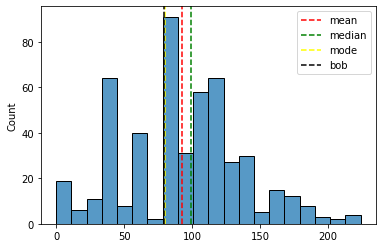

A person entering the casino and playing every game has a chance to go positive equal to 46%
The average balance after playing is 92.748
The median balance after playing is 99.0
The most common balance after playing is 80.0
The skewness of the curve is 0.15 (right-skewed)
In the 1000 loops the total money lost is -3626.0
A person lost every chip while playing these games 4% of the times
The best payout in these 500 simulations was equal to 224.0


In [10]:
win_percentage = (len([i for i in total_money if i>100])/len(total_money))*100
mean = np.mean(total_money)
median = np.median(total_money)
mode = scipy.stats.mode(total_money)[0][0]
skewness = scipy.stats.skew(total_money)
total_money_lost = sum([i-100 for i in total_money])
min_result_times = total_money.count(0)
max_result = max(total_money)

sns.histplot(data=total_money, bins=20)

mode_plt = plt.axvline(mode, color='yellow', linestyle="dashed")
median_plt = plt.axvline(median, color='green', linestyle="dashed")
mean_plt = plt.axvline(mean, color='red', linestyle="dashed")
bob_plt = plt.axvline(79, color="black", linestyle="dashed")

plt.legend([mean_plt, median_plt, mode_plt, bob_plt], ["mean", "median", "mode", "bob"])
plt.show()

print("A person entering the casino and playing every game has a chance to go positive equal to " + str(round(win_percentage)) + "%")
print("The average balance after playing is " + str(mean))
print("The median balance after playing is " + str(median))
print("The most common balance after playing is " + str(mode))
print("The skewness of the curve is " + str(round(skewness, 2)) + " (right-skewed)")
print("In the 1000 loops the total money lost is " + str(total_money_lost))
print("A person lost every chip while playing these games " + str(round((min_result_times/500)*100)) + "% of the times")
print("The best payout in these 500 simulations was equal to " + str(max_result))


Since we stored the seed of every run of the loop we can see how the run of the lucky player went.

In [11]:
random.seed(total_money.index(max_result))
Bob = Casino()
Bob.heads_or_tails(20, prediction="Heads", autoplay=True)
Bob.slot_machine(20)
Bob.blackjack(20, autoplay=True)
Bob.roulette(20, odd_or_even="Odd")
Bob.baccarat(20, player_or_better="Player")

Bob.exit_the_casino()

Welcome to the 'Games of Chance' casino! you have 100 chips you can bet. Good Luck!
-> Playing Heads or Tails...
You've bet on: Heads
----------------------
The result is: Heads
- You won!
Do you want to double or nothing?
No
Your balance is: 120
-> Playing Slot Machines...
------------------------
PEAR     7        7
------------------------
7        PEAR     CHERRY
------------------------
PEAR     PEAR     7
------------------------
DOUBLE PEAR!!
DOUBLE PEAR!
- You won!
Your balance is: 165.0
-> Playing Blackjack...
Your cards: 4 10 (Total = 14)
Banker's card: 7
You picked 5 (Total = 19)
Banker picked 7 (Total = 14)
Banker picked Q (Total = 24)
- You won!
Your balance is: 185.0
-> Playing Roulette...
You've bet on:
Odd
The number was: 19 (Odd, Passe, Red)
- You won!
Your balance is: 205.0
-> Playing Baccarat...
Player's cards: 6 K (Total = 6)
Banker's cards: K K (Total = 0)
Player stands
Banker draws: 3 (Total = 3)
(Banker pair)
- Player wins! -
Your balance is: 224.0
Thanks for com

A successful double or nothing and a blackjack helped the lucky player go through the casino without losing a single time.

We looked at how a typical night at the casino playing every game will typically look, but the sample size (500) could be  higher, we will be focusing on that later. Now let's look at the statistics of winning for every singular game.

In [12]:
%%capture
                # Partial is used to store the functions and their parameters before being called in the loops
games_to_play = [[partial(Bob.heads_or_tails, betted_money=20, prediction="Heads", autoplay=True), "heads or tails"], 
                 [partial(Bob.slot_machine, betted_money=20), "slot machines"],
                 [partial(Bob.blackjack, betted_money=20, autoplay=True), "blackjack"],
                 [partial(Bob.roulette, betted_money=20, red_black_green="Red"), "roulettes betting on red/black"],
                 [partial(Bob.roulette, betted_money=20, numbers=[1, 2, 3, 4, 5, 6]), "roulettes betting on numbers"],
                 [partial(Bob.baccarat, betted_money=20, player_or_better="Player"), "baccarat as a player"],
                 [partial(Bob.baccarat, betted_money=20, player_or_better="Better", x_win="Banker"), "baccarat betting on a banker's win"]]

all_total_money = []
for game in games_to_play: # Doing it every time
    total_money = []
    for i in range(1000, 5000, 5): # Looping 1000 times (but with different seeds as last time)
        Bob.set_money(100)
        for j in range(5):# Playing 5 times
            random.seed(i+j)
            game[0]()
        total_money.append(Bob.balance())
    all_total_money.append(total_money)

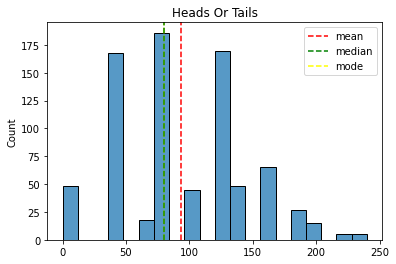

A person entering the casino and playing heads or tails every game has a chance to go positive equal to 42%
The average balance after playing is 93.575
The median balance after playing is 80.0
The most common balance after playing is 80
The skewness of the curve is 0.22 (right-skewed)
In the 1000 loops the total money lost is -5140
A person lost every chip while playing these games 5% of the times
The best payout in these 1000 simulations was equal to 240


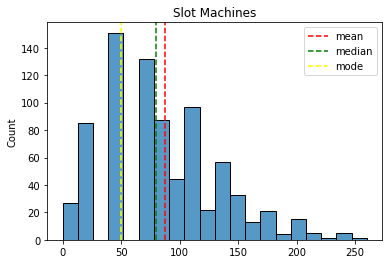

A person entering the casino and playing slot machines every game has a chance to go positive equal to 34%
The average balance after playing is 87.1125
The median balance after playing is 80.0
The most common balance after playing is 50.0
The skewness of the curve is 0.58 (right-skewed)
In the 1000 loops the total money lost is -10310.0
A person lost every chip while playing these games 3% of the times
The best payout in these 1000 simulations was equal to 260.0


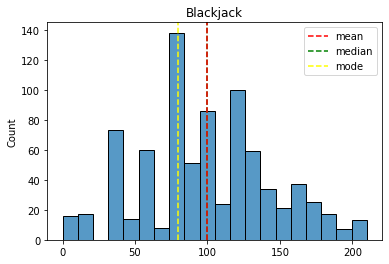

A person entering the casino and playing blackjack every game has a chance to go positive equal to 42%
The average balance after playing is 99.725
The median balance after playing is 100.0
The most common balance after playing is 80.0
The skewness of the curve is 0.09 (no skew)
In the 1000 loops the total money lost is -220.0
A person lost every chip while playing these games 2% of the times
The best payout in these 1000 simulations was equal to 210.0


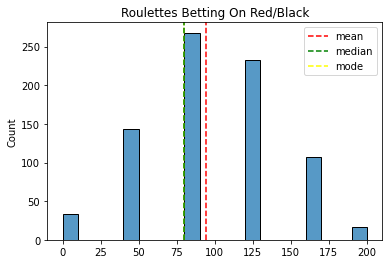

A person entering the casino and playing roulettes betting on red/black every game has a chance to go positive equal to 44%
The average balance after playing is 94.3
The median balance after playing is 80.0
The most common balance after playing is 80
The skewness of the curve is 0.03 (no skew)
In the 1000 loops the total money lost is -4560
A person lost every chip while playing these games 3% of the times
The best payout in these 1000 simulations was equal to 200


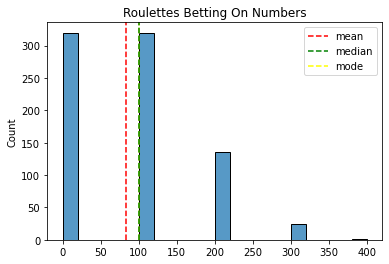

A person entering the casino and playing roulettes betting on numbers every game has a chance to go positive equal to 20%
The average balance after playing is 83.75
The median balance after playing is 100.0
The most common balance after playing is 100
The skewness of the curve is 0.73 (right-skewed)
In the 1000 loops the total money lost is -13000
A person lost every chip while playing these games 32% of the times
The best payout in these 1000 simulations was equal to 400


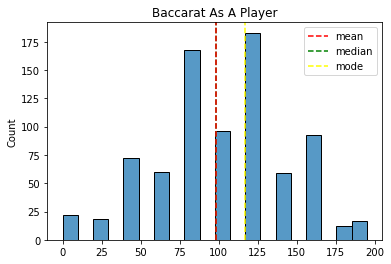

A person entering the casino and playing baccarat as a player every game has a chance to go positive equal to 46%
The average balance after playing is 98.38375
The median balance after playing is 98.0
The most common balance after playing is 117.0
The skewness of the curve is -0.1 (left-skewed)
In the 1000 loops the total money lost is -1293.0
A person lost every chip while playing these games 2% of the times
The best payout in these 1000 simulations was equal to 195.0


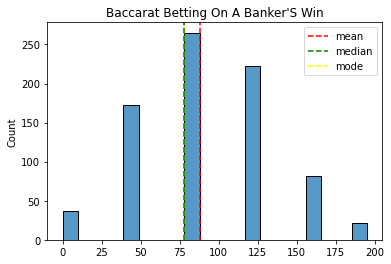

A person entering the casino and playing baccarat betting on a banker's win every game has a chance to go positive equal to 41%
The average balance after playing is 88.0425
The median balance after playing is 78.0
The most common balance after playing is 78.0
The skewness of the curve is 0.18 (right-skewed)
In the 1000 loops the total money lost is -9566.0
A person lost every chip while playing these games 4% of the times
The best payout in these 1000 simulations was equal to 195.0


In [13]:
total_results = []
for i in range(len(games_to_play)):
    total_money = all_total_money[i]
    
    win_percentage = (len([j for j in total_money if j>100])/len(total_money))*100
    mean = np.mean(total_money)
    median = np.median(total_money)
    mode = scipy.stats.mode(total_money)[0][0]
    skewness = scipy.stats.skew(total_money)
    skewness_type = ""
    if skewness < -0.1:
        skewness_type = "left-skewed"
    elif skewness > 0.1:
        skewness_type = "right-skewed"
    else:
        skewness_type = "no skew"
    total_money_lost = sum([i-100 for i in total_money])
    min_result_times = total_money.count(0)
    max_result = max(total_money)

    total_results.append([games_to_play[i][1], win_percentage, mean, median, mode, skewness, total_money_lost, min_result_times, max_result])

    sns.histplot(data=total_money, bins=20)

    mode_plt = plt.axvline(mode, color='yellow', linestyle="dashed")
    median_plt = plt.axvline(median, color='green', linestyle="dashed")
    mean_plt = plt.axvline(mean, color='red', linestyle="dashed")
    plt.title(games_to_play[i][1].title())
    plt.legend([mean_plt, median_plt, mode_plt], ["mean", "median", "mode"])
    plt.show()

    print("A person entering the casino and playing " + games_to_play[i][1] + " every game has a chance to go positive equal to " + str(round(win_percentage)) + "%")
    print("The average balance after playing is " + str(mean))
    print("The median balance after playing is " + str(median))
    print("The most common balance after playing is " + str(mode))
    print("The skewness of the curve is " + str(round(skewness, 2)) + " (" + skewness_type + ")")
    print("In the 1000 loops the total money lost is " + str(total_money_lost))
    print("A person lost every chip while playing these games " + str(round((min_result_times/1000)*100)) + "% of the times")
    print("The best payout in these 1000 simulations was equal to " + str(max_result))

After seeing a statistical analysis of every casino game, let's see the broader, more general results.
Let's start by creating a dataset.

In [14]:
games_data = pd.DataFrame(total_results, columns=["Name", "Win percentage", "Mean", "Median", 
                                                  "Mode", "Skewness", "Total money lost", "Number of bankrupts", "Best result"])

print(games_data)
print("----------------------------------")
print(games_data.mean())

                                 Name  Win percentage      Mean  Median  \
0                      heads or tails          41.875  93.57500    80.0   
1                       slot machines          34.250  87.11250    80.0   
2                           blackjack          42.125  99.72500   100.0   
3      roulettes betting on red/black          44.500  94.30000    80.0   
4        roulettes betting on numbers          20.125  83.75000   100.0   
5                baccarat as a player          45.500  98.38375    98.0   
6  baccarat betting on a banker's win          40.750  88.04250    78.0   

    Mode  Skewness  Total money lost  Number of bankrupts  Best result  
0   80.0  0.215711           -5140.0                   48        240.0  
1   50.0  0.577450          -10310.0                   27        260.0  
2   80.0  0.093643            -220.0                   16        210.0  
3   80.0  0.026648           -4560.0                   33        200.0  
4  100.0  0.734338          -13000

At the "Games of Chance" casino, on average the player/better wins a little more than a third of the time, he usually loses about 1/10 of the original amount (much more if we glance at the median); all games but the fifth one are generally right-skewed towards lesser values, as it is shown in the total money lost column after playing 1000 times; About 1/8th of the times the player loses all its money playing five times a certain game. 

A supplementary inquiry I wanted to test with these functions was how long could a player last before going eventually bankrupt?

I'll make the number of initial chips higher (from 100 to 200) and additionally make 30 runs per game to find their average to avoid early losers.

In [15]:
%%capture
random.seed(123456)

all_total_money_per_gen = [] # Will contain the average run of every game
for game in games_to_play:
    
    Bob.set_money(200)
    game[0] # Somehow removing this line breaks everything, do not touch
    total_money_per_gen = [] # Will contain all the runs for a single game
    for i in range(30):
        
        total_money = [] # Will contain a single run
        Bob.set_money(200)
        
        while Bob.balance() >= 20 and len(total_money) <= 500: # While not bankrupt
            game[0]()
            total_money.append(Bob.balance())
            
        if len(total_money) < 500: # If the run goes bankrupt before reaching 500 tries fill the remaining with 0s
            remainder = 500-len(total_money)
            for i in range(0, remainder):
                total_money.append(0)
        total_money_per_gen.append(total_money)
    
    
    avg_total_money_per_gen = [] # Finding average of the 30 runs
    for z in range(500):
        mean = np.mean([i[z] for i in total_money_per_gen])
        avg_total_money_per_gen.append(round(mean, 2))

    all_total_money_per_gen.append(avg_total_money_per_gen)

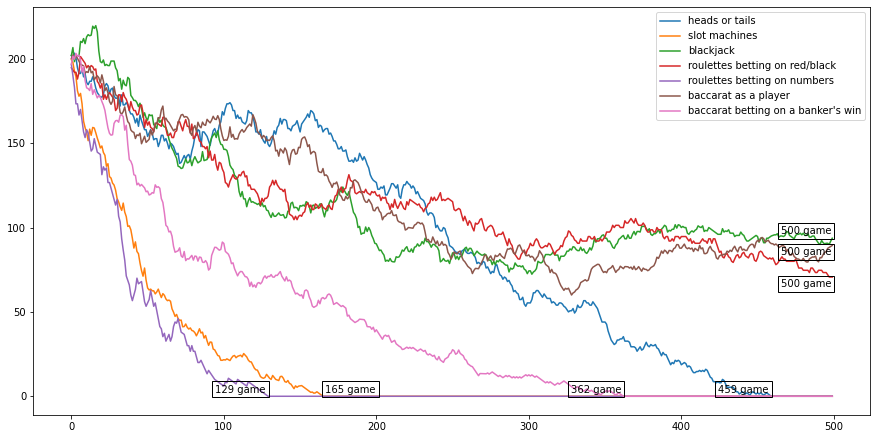

In [16]:
texts = []
for i in range(len(all_total_money_per_gen)):
    if 0 in all_total_money_per_gen[i]:
        x = all_total_money_per_gen[i].index(0)
        y = 0
    else:
        x = 500
        y = all_total_money_per_gen[i][-1]
    
    texts.append(plt.text(x, y, str(x)+" game",  bbox=dict(boxstyle="square", facecolor="None")))
    sns.lineplot(data=all_total_money_per_gen[i])

adjust_text(texts)
plt.gcf().set_size_inches(15, 7.5)
plt.legend([games_to_play[i][1] for i in range(len(games_to_play))])
plt.show()

The unfavourable choice of betting on six numbers in roulette was the first to bring the player to bankrupcy in about 130 games played, shortly after the slot machines brought the chip count to 0 at 165 games played, the greed in doubling or nothing in heads or tails caused the player's downfall before the 500 threshold, a similar end happened for betting on a banker's win in baccarat; only the roulette bets on red or black didn't make the player go bankrupt, with the bets on blackjack and baccarat (as a player), even tho these bets already caused the player to lose half of their starting chips and slowly but surely in the near future are going to get him bankrupt.

I think that after the last query I'll end this stat report about gambling and chances.

In conclusion we can easily extrapolate that gambling in these games will always, ALWAYS, favor the casino and lead to ther inevitable bankrupcy of the player.

Don't ever enter in a gambling addiction and happy coding!